### Import Modules

In [1]:
import os, glob, re, copy, pdb
import face_recognition
import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from PIL import Image
import cv2

plt.rc('font', family='NanumGothic') ## Change Korean Font

### Class contains all modules to find nearest face

In [2]:
class NearestFace():
    def __init__(self):
        self.dir_path = os.getenv('HOME')+'/aiffel/EXPLORATION/exploration_5/images/celebrity'
        self.image_paths= glob.glob(self.dir_path+"/*.jpg")
        
    def get_cropped_face(self, image_file):
        image = face_recognition.load_image_file(image_file)
        face_locations = face_recognition.face_locations(image)
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]

        return cropped_face

    def get_face_embedding(self, face):
        return face_recognition.face_encodings(face)

    def get_face_embedding_dict(self, dir_path):
        file_list= glob.glob(dir_path+"/*.jp*g")
        self.embedding_dict = {}
        for i, file in enumerate(file_list):
            file_name = (file.split('/')[-1]).split('.')[0]
            face= self.get_cropped_face(file)
            embedding = self.get_face_embedding(face)
            if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                                        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                self.embedding_dict[file_name] = embedding[0]
        return self.embedding_dict

    def get_distance(self, name1, name2):
        return np.linalg.norm(self.embedding_dict[name1]-self.embedding_dict[name2], ord=2)
    
    def get_sort_key_func(self, name1):
        def get_distance_from_name1(name2):
            return self.get_distance(name1, name2)
        return get_distance_from_name1
  
    def get_nearest_face(self, name, top=5):
        sort_key_func = self.get_sort_key_func(name)
        sorted_faces = sorted(self.embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
        celeb_list=[]
        self.same_person=[name]
        count=0
        count_nearest=0
        for i in range(top+3):
            if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
                continue
            if sorted_faces[i]:
                if re.search(sorted_faces[i][0][:-1], name[:-1]):
                    print('최상위 순위: 이름({}), 거리({})'.format(sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
                    print('같은 사람은 당연히 제일 가까운 distance 일 것이므로, 내 사진은 nearest face 순위에서 제외. \n')
                    self.same_person.append(sorted_faces[i][0])
                    count+=1
                else:
                    print('순위 {} : 이름({}), 거리({})'.format(i-count, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
                    celeb_list.append(sorted_faces[i][0])
                    count_nearest+=1
                    if count_nearest==5: break
        return celeb_list

In [3]:
NF = NearestFace()

In [4]:
NF.embedding_dict= NF.get_face_embedding_dict(NF.dir_path) ## generate embedding dictionary

In [5]:
len(NF.embedding_dict.keys())

287

### 첫번째 사진과 가장 가까운 5명 찾기

In [6]:
file_name= 'heej1'
celeb_list = NF.get_nearest_face(file_name, 5) ## check 

최상위 순위: 이름(heej2), 거리(0.3354030174559341)
같은 사람은 당연히 제일 가까운 distance 일 것이므로, 내 사진은 nearest face 순위에서 제외. 

순위 1 : 이름(김다미), 거리(0.3533020159969897)
순위 2 : 이름(박보영), 거리(0.35808349708539544)
순위 3 : 이름(홍수현), 거리(0.3591532727384205)
순위 4 : 이름(고준희), 거리(0.35946401845345555)
순위 5 : 이름(사쿠라), 거리(0.3597718606928045)


In [7]:
NF.same_person ## 내 사진은 같은 사람으로 나옴.

['heej1', 'heej2']

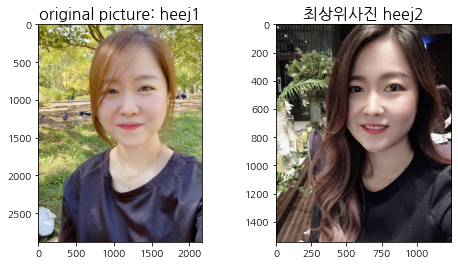

In [8]:
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

for i, ax in enumerate(axes.flatten()):
    img_path= os.path.join(NF.dir_path, NF.same_person[i]+'.jpg')
    image = img.imread(img_path) #dir_path+'/'+file_list[i])
    ax.imshow(image)
    if i==0:
        ax.set_title('original picture: {}'.format(NF.same_person[i]), fontsize=16)
    else:
        ax.set_title('최상위사진 {}'.format(NF.same_person[i]), fontsize=16)
    
plt.show()
plt.cla()
plt.clf()
plt.close()



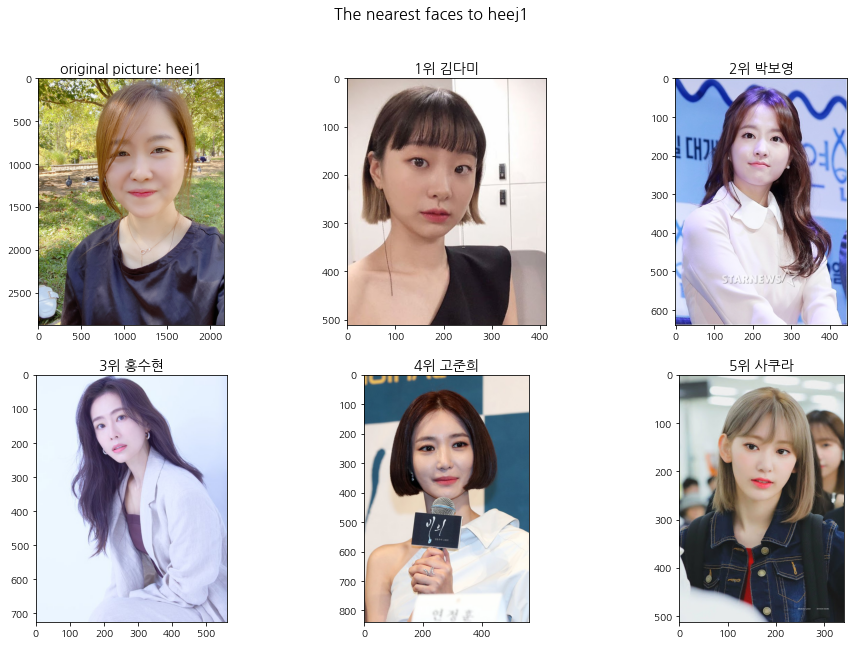

In [9]:
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    if i==0: 
        img_path= os.path.join(NF.dir_path, file_name+'.jpg')
        image = img.imread(img_path) #dir_path+'/'+file_list[i])
        ax.imshow(image)
        ax.set_title('original picture: {}'.format(file_name), fontsize=14)
    elif i>0 and i <= len(celeb_list):
        file_name= celeb_list[i-1]+'.jpg'
        img_path= os.path.join(NF.dir_path, file_name)
        image = img.imread(img_path) #dir_path+'/'+file_list[i])
        ax.imshow(image)
        ax.set_title('{}위 {}'.format(i, celeb_list[i-1]), fontsize=14)
plt.suptitle('The nearest faces to {}'.format('heej1'), fontsize=16)
plt.show()
plt.cla()
plt.clf()
plt.close()

### 두번째 사진과 가장 가까운 5명 찾기

In [10]:
file_name= 'heej2'
celeb_list = NF.get_nearest_face(file_name, 5) ## check 

최상위 순위: 이름(heej1), 거리(0.3354030174559341)
같은 사람은 당연히 제일 가까운 distance 일 것이므로, 내 사진은 nearest face 순위에서 제외. 

순위 1 : 이름(강민경), 거리(0.3920896255138617)
순위 2 : 이름(박보영), 거리(0.39224940399286257)
순위 3 : 이름(윤아), 거리(0.4119677977100631)
순위 4 : 이름(지호), 거리(0.41895655318628955)
순위 5 : 이름(아린), 거리(0.4194345950883859)


In [11]:
NF.same_person ## 내 사진은 같은 사람으로 나옴.

['heej2', 'heej1']

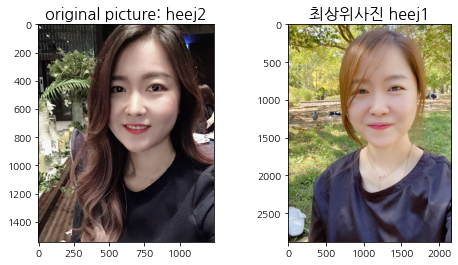

In [12]:
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

for i, ax in enumerate(axes.flatten()):
    img_path= os.path.join(NF.dir_path, NF.same_person[i]+'.jpg')
    image = img.imread(img_path) 
    ax.imshow(image)
    if i==0:
        ax.set_title('original picture: {}'.format(file_name), fontsize=16)
    else:
        ax.set_title('최상위사진 {}'.format(NF.same_person[i]), fontsize=16)
    
plt.show()
plt.cla()
plt.clf()
plt.close()



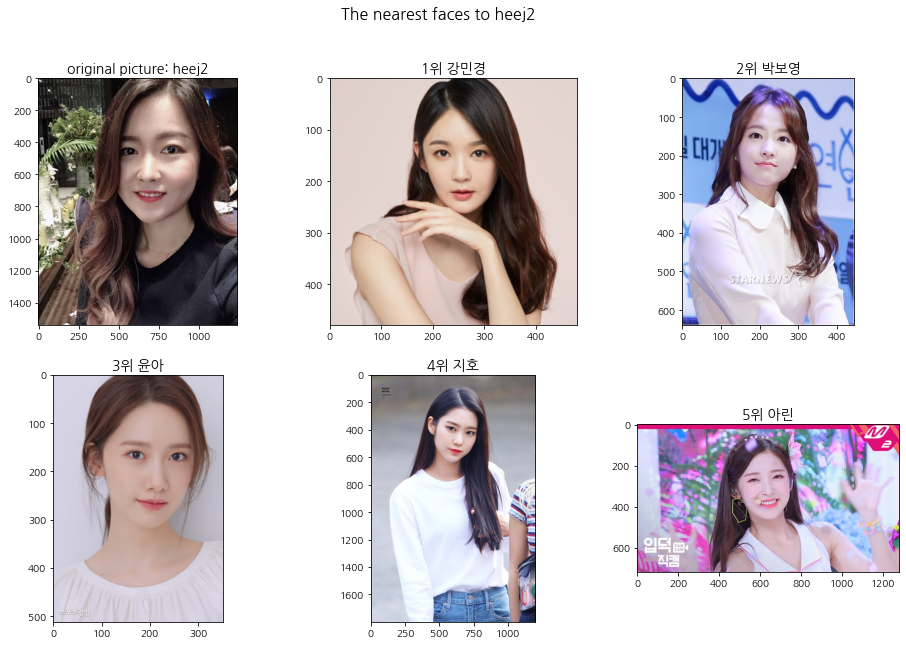

In [13]:
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    if i==0: 
        img_path= os.path.join(NF.dir_path, file_name+'.jpg')
        image = img.imread(img_path) 
        ax.imshow(image)
        ax.set_title('original picture: {}'.format(file_name), fontsize=14)
    elif i>0 and i <= len(celeb_list):
        file_name= celeb_list[i-1]+'.jpg'
        img_path= os.path.join(NF.dir_path, file_name)
        image = img.imread(img_path) 
        ax.imshow(image)
        ax.set_title('{}위 {}'.format(i, celeb_list[i-1]), fontsize=14)
plt.suptitle('The nearest faces to {}'.format('heej2'), fontsize=16)
plt.show()
plt.cla()
plt.clf()
plt.close()

## 회고
### Data used
- 287개 (285개의 유명인 사진 + 내 사진 2개)
- format: jpg, jpeg 이미지 파일
- comparison data: 내 사진 2장 (heej1, heej2) 을 고를 때에는 두가지를 비교하기 위하여 최대한 사람의 눈으로 볼 땐 다르게 보이는 사진을 선정하였다.

### Modules used in the NearestFace class:
- get_cropped_face: detect and crop face from picture
    - face_recognition 라이브러리 사용
    - 각 사진에서 얼굴 부분의 위치를 찾아 크롭
- get_face_embedding: get face embedding from each cropped face
    - face_recognition 라이브러리를 사용하여 크롭된 얼굴 사진의 embedding vector 찾음
- get_face_embedding_dict: generate dictionary containing embedding vectors of all photos
    - 위 함수에서 찾은 모든 사진의 embedding vector 를 딕셔너리에 저장
- get_distance: calculate distance between 2 given photos
    - 내 사진 한개의 임베딩벡터와 딕셔너리에 있는 모든 얼굴의 임베딩 벡터와 각각 그 거리를 계산
    - L2 distance 로 계산함
- get_sort_key_func: sort the list by distance from the closest
    - 각각 계산한 L2 distance 값을 내 사진과 가장 가까운 distance 순으로 sort
- get_nearest_face: select 5 photos nearest to comparison data
    - 기준사진 포함 내 사진을 제외하고, 나머지 중 기준 사진과 가장 가까운 5명의 사진 선정
    
### Visualization
- matplotlib 사용
- 분위기가 다른 내 사진 두장이 다른 사람들 사진보다 거리가 가깝게 나옴 (5명 선정시 제외)
- 내 사진 제외, 내 기준 사진과 비슷한 얼굴 5명의 사진을 matplotlib 를 사용하여 시각화

### Analysis
- 내 사진 두장의 거리는 0.335가 나온 것에 반해 nearest face 의 top5 사진들은 내 사진과의 거리가 약 0.35 ~ 0.42 정도가 나왔다. 
- 내 사진 두장을 각각 기준 사진으로 찾았을 때, 각각 nearest face 순위가 달라졌다. 같은 사람 사진이라도 embedding vector 가 다르다는 것을 알 수 있다. 
- 두장의 사진을 각각 기준 사진으로 선정했을 때, 나머지 하나의 사진이 최상위 사진으로 선정 되었다. 두 사진 각각의 embedding vector가 달라 nearest face 순위가 바뀌었는데도 L2 distance 는 다른 사진들에 비해 가장 가깝게 나온것을 볼 수 있다.